In [4]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from matplotlib import pyplot as plt
from colorama import Fore


from tqdm import tqdm
import sys
import gc
import math
import random
import os
import pandas as pd
import numpy as np

# Visuals and CV2
import matplotlib.pyplot as plt
#import cudf, cuml, cupy
import cv2

#torch
import torch
#import timm
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import Dataset,DataLoader
import torch.nn.functional as F 
from torch import nn 
from torch.optim.optimizer import Optimizer
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, CosineAnnealingLR, ReduceLROnPlateau

import warnings 
warnings.filterwarnings('ignore')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
# Displaying routine

def display_images(in_, out, size=28, n=1, label=None, count=False):
    for N in range(n):
        if in_ is not None:
            in_pic = in_.data.cpu().view(-1, size, size)
            plt.figure(figsize=(50, 12))#figsize=(50, 12))
            plt.suptitle(label + ' – real test data / reconstructions', color='w', fontsize=16)
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = out.data.cpu().view(-1, size, size)
        plt.figure(figsize=(50, 12))#figsize=(50, 12)
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')
            if count: plt.title(str(4 * N + i), color='w')

In [6]:
# Set random seeds

#torch.manual_seed(1)# Defining the model

d = 40
size = 128

class VAE(nn.Module):
    def __init__(self):
        #self.size = size
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Linear(size**2, d ** 2),
            nn.BatchNorm1d(d ** 2),
            nn.Mish(),
            nn.Linear(d ** 2, d * 2)
        )

        self.decoder = nn.Sequential(
            nn.Linear(d, d ** 2),
            nn.BatchNorm1d(d ** 2),
            nn.Mish(),
            nn.Linear(d ** 2, size**2),
            nn.Sigmoid(),
        )

    def reparameterise(self, mu, logvar):
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = std.new_empty(std.size()).normal_()
            return eps.mul_(std).add_(mu)
        else:
            return mu

    def forward(self, x):
        mu_logvar = self.encoder(x.view(-1, size**2)).view(-1, 2, d)
        mu = mu_logvar[:, 0, :]
        logvar = mu_logvar[:, 1, :]
        z = self.reparameterise(mu, logvar)
        return self.decoder(z), mu, logvar

model = VAE().to(device)
torch.cuda.manual_seed(1)

In [12]:
model = VAE()
state_dict = torch.load("model_best_loss.pth")
model.load_state_dict(state_dict)

<All keys matched successfully>

In [38]:
# Displaying routine

def display_images(in_, out, size=28, n=1, label=None, count=False):
    for N in range(n):
        if in_ is not None:
            in_pic = in_.data.cpu().view(-1, size, size)
            plt.figure(figsize=(50, 12))#figsize=(50, 12))
            plt.suptitle(label + ' – real test data / reconstructions', color='w', fontsize=16)
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = out.data.cpu().view(-1, size, size)
        plt.figure(figsize=(50, 12))#figsize=(50, 12)
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')
            if count: plt.title(str(4 * N + i), color='w')

In [34]:
img = cv2.imread(r"Signet\Signatures\0.png")
img  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (128, 128))
img = torch.from_numpy(img).unsqueeze(0)
img = img / 255.0
model.eval()
with torch.no_grad():
   forged, _, _ = model(img)

In [48]:
out_pic.shape

torch.Size([128, 128, 1])

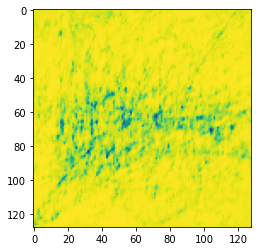

In [47]:
out_pic = forged.data.cpu().view( 128, 128, -1)
plt.imshow(out_pic)

In [37]:
display_images()

torch.Size([1, 16384])